# Globos

Estos datos fueron previamente utilizados en el experimento de psicología cognitiva y representan diferentes condiciones de un experimento.

In [1]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from IPython.display import Image  
from io import StringIO

In [2]:
df = pd.read_csv("../tp3_aprendizaje_bayesiano/globos.csv", header=None)
df.rename(columns = {0:'Color', 1:'Size', 2:'Prof', 3:'Age', 4:'Status'}, inplace = True)
df

,Color,Size,Prof,Age,Status
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


In [3]:
class_names = list(np.unique(df.values[:,4]))
print(class_names)

['F', 'T']


## Procesamiento de datos
El dataset contiene valores nominales por lo tanto, encodeamos los valores nominales en un valor numérico

In [4]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

## Elaboracion de modelo

### Subconjunto de atributos

In [5]:
data = df.values[:,:4]
data_columns = list(df.columns.values[:4])
print(data_columns)

['Color', 'Size', 'Prof', 'Age']


### Subconjunto de clases

In [6]:
target=df.values[:,4]

## Conjuntos de entrenamiento y prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

## Clasificacion por criterio del índice Gini

In [8]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
print("Precisión: ",metrics.accuracy_score(y_test, y_pred))

Precisión:  1.0


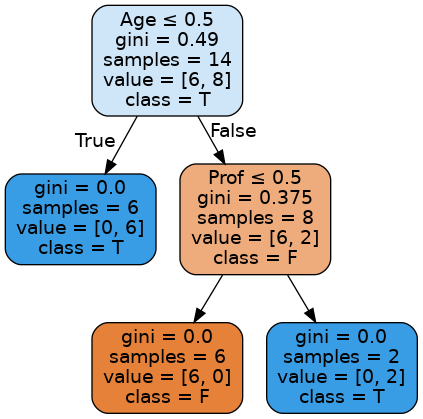

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Clasificacion por criterio de ganancia

In [11]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
print("Precisión: ",metrics.accuracy_score(y_test, y_pred))

Precisión:  1.0


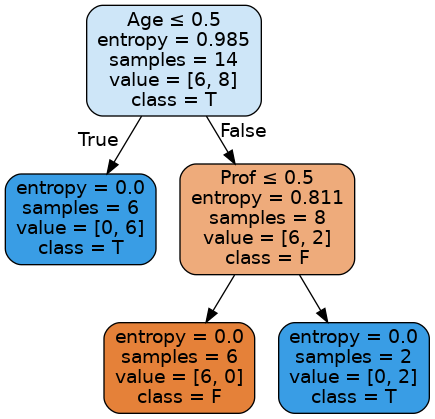

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Conclusiones

- ¿Se logró una exactitud mayor que con aprendizaje bayesiano?

En este caso, ambos ejercicios contienen la misma precisión.

- ¿Cuál es la profundidad óptima del árbol?

Podemos especificar como profundidad óptima el nivel 2 que es donde el algoritmo termina de clasificar a los datos ingresados en los nodos denominados como hojas.

- ¿Cuánta diferencia en la exactitud del resultado existe con los métodos de ganancia y gini?

No hay diferencia en la exactitud del resultado